In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#시그모이드 함수 expit()사용을 위해 scipy.special 불러오기
import scipy.special
import seaborn as sns
plt.style.use('ggplot')

In [2]:
#신경망 클래스의 정의(은닉계층 하나)
class neuralNetwork:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors = np.dot(self.who.T,output_errors)
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who,hidden_outputs)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [3]:
#신경망 클래스의 정의(은닉계층2개)
class neuralNetwork2:
    
    #신경망 초기화하기
    def __init__(self,inputnodes,hiddennodes,hiddennodes2,outputnodes,learningrate):
        self.inodes=inputnodes
        self.hnodes=hiddennodes
        self.hnodes2=hiddennodes2
        self.onodes=outputnodes
        
        '''
        가중치 행렬 wih와 who
        배열 내 가중치는 w_i_j로 표기, 노드 i에서 다음 계층의 노드 j로 연결됨을 의미
        w11 w21
        w12 w22 등'''
        self.wih=np.random.normal(0.0,pow(self.hnodes,-0.5),(self.hnodes,self.inodes))   #정규분포로 더욱 정교한 가중치 설정
        self.who=np.random.normal(0.0,pow(self.hnodes2,-0.5),(self.hnodes2,self.hnodes))
        self.who2=np.random.normal(0.0,pow(self.onodes,-0.5),(self.onodes,self.hnodes2))
        
        #학습률
        self.lr=learningrate
        
        #활성화 함수로 시그모이드 함수를 이용
        def sigmoid(x):
            return 1/(1+np.exp(-x))
        
        
        
        self.activation_function = lambda x: sigmoid(x)
            
        pass
    #신경망 학습시키기
    def train(self, inputs_list,targets_list):
        #입력 리스트를 2차원의 행렬로 반환
        inputs=np.array(inputs_list,ndmin=2).T
        targets=np.array(targets_list,ndmin=2).T
        
        #은닉 계층으로 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        #출력 계층의 오차는(실제값-계산값)
        output_errors = targets-final_outputs
        #은닉 계층의 오차는 가중치에 의해 나뉜 출력 계층의 오차들을 재조합해서 계산
        hidden_errors2 = np.dot(self.who2.T,output_errors)
        hidden_errors = np.dot(self.who.T,hidden_errors2)
        
        
        #은닉 계층과 출력 계층 간의 가중치 업데이트
        self.who2+= self.lr*np.dot((output_errors*final_outputs*(1.0-final_outputs)),np.transpose(hidden_outputs2))
        
        #은닉 계층2와 은닉 계층 간의  가중치 업데이트
        self.who += self.lr*np.dot((hidden_errors2*hidden_outputs2*(1.0-hidden_outputs2)),np.transpose(hidden_outputs))
        
        #입력 계층과 은닉 계층 간의 가중치 업데이트
        self.wih+= self.lr*np.dot((hidden_errors*hidden_outputs*(1.0-hidden_outputs)),np.transpose(inputs))
        
        pass
    
    #신경망 질의하기
    def query(self, input_list):
        
        #입력 리스트를 2차원 행렬로 변환
        inputs=np.array(input_list, ndmin=2).T
        
        #은닉 계층에서 들어오는 신호를 계산
        hidden_inputs=np.dot(self.wih,inputs)
        #은닉 계층에서 나가는 신호를 계산
        hidden_outputs=self.activation_function(hidden_inputs)
        
        # 은닉 계층2로 받는 신호 계산
        hidden_inputs2 = np.dot(self.who,hidden_outputs)
        #은닉 계층2에서 나가는 신호 계산
        hidden_outputs2 = self.activation_function(hidden_inputs2)
        
        #최종 출력 계층으로 들어오는 신호를 계산
        final_inputs=np.dot(self.who2,hidden_outputs2)
        #최종 출력 계층에서 나가는 신호를 계산
        final_outputs=self.activation_function(final_inputs)
        
        return final_outputs

In [4]:
training_data_file = open("mnist_train.csv",'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [5]:
test_data_file = open("mnist_test.csv",'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [6]:
input_nodes = 784
hidden_nodes = [100,200,300,400,500]
output_nodes = 10
learning_rate=[0.01,0.05,0.1,0.15,0.2]

In [7]:
for i in range(5):
    globals()['n{}'.format(i)] = neuralNetwork(input_nodes,hidden_nodes[i],output_nodes,learning_rate[0])
# hidden_nodes, learning_rate 의 개수가 다른 신경망 구성

In [8]:
epochs=5
scorecard=[]
df=pd.DataFrame(columns=['learning_rate','hidden_nodes','score'])
idx=0
for n in [n0,n1,n2,n3,n4]:
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
            targets=np.zeros(output_nodes)+0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs,targets)
            pass
    
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        outputs = n.query(inputs) # 신경망에 물어보는 것 train 값에 기초해서 얘 뭐나와? 이런거
        label=np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    scorecard_array=np.asarray(scorecard)
       
    df.loc[idx,'learning_rate'] = learning_rate[idx]
    df.loc[idx,'hidden_nodes'] = hidden_nodes[idx]
    df.loc[idx,'score'] = scorecard_array.sum()/scorecard_array.size
    idx+=1
df

,learning_rate,hidden_nodes,score
0,0.01,100,0.9557
1,0.05,200,0.95775
2,0.1,300,0.959633
3,0.15,400,0.961225
4,0.2,500,0.96212


In [9]:
df['lr+hn'] = df['learning_rate'].astype(str)+'-'+df['hidden_nodes'].astype(str)

In [10]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0.5, 1.0, 'learning_rate,hidden_nodes에 따른 정확도 차이')

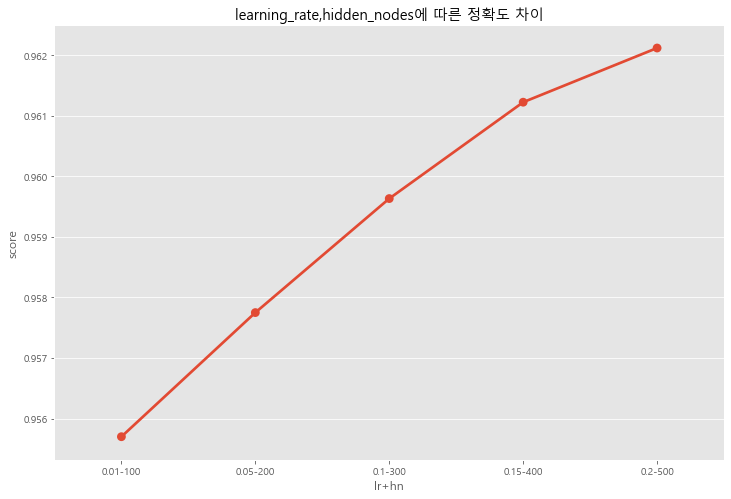

In [11]:
plt.figure(figsize=(12,8))
sns.pointplot(data=df,x='lr+hn',y='score')
plt.title("learning_rate,hidden_nodes에 따른 정확도 차이")

- learning_rate=0.01, hidden_layer=100 조합이 best
    - learning_rate 따로 hidden_layer 따로 했어야하는데 시간이 너무 많이 걸리므로 이 조합으로 결정
   
   - Restart & Run All 했는데 결과가 달라졌습니다..

In [12]:
input_nodes = 784
hidden_nodes = 100
hidden_nodes2 = 100
output_nodes = 10
learning_rate=0.01
n=neuralNetwork2(input_nodes,hidden_nodes,hidden_nodes2,output_nodes,learning_rate)

In [13]:
epochs=5
for e in range(epochs):
    for record in training_data_list:
        all_values = record.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        targets=np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99
        n.train(inputs,targets)
        pass
    pass

In [14]:
scorecard=[]
for record in test_data_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    outputs = n.query(inputs) # 신경망에 물어보는 것 train 값에 기초해서 얘 뭐나와? 이런거
    label=np.argmax(outputs)
    if label == correct_label:
        scorecard.append(1)
    else:
        scorecard.append(0)

In [15]:
scorecard_array=np.asarray(scorecard)
print("performance = ",scorecard_array.sum()/scorecard_array.size)

performance =  0.9668


- 더 높아질 가능성을 봄..
- hidden node2만 node의 개수를 다르게 해서 도전

In [16]:
input_nodes = 784
hidden_nodes = 100
hidden_nodes2 = [100,200,300,400]
output_nodes = 10
learning_rate=0.01

In [17]:
for i in range(4):
    globals()['n_{}'.format(i)] = neuralNetwork2(input_nodes,hidden_nodes,hidden_nodes2[i],output_nodes,learning_rate)
# hidden_nodes, learning_rate 의 개수가 다른 신경망 구성

In [18]:
epochs=5
scorecard=[]
df2=pd.DataFrame(columns=['learning_rate','hidden_nodes','score'])
idx=0
for n in [n_0,n_1,n_2,n_3]:
    for e in range(epochs):
        for record in training_data_list:
            all_values = record.split(',')
            inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
            targets=np.zeros(output_nodes)+0.01
            targets[int(all_values[0])] = 0.99
            n.train(inputs,targets)
            pass
    
    for record in test_data_list:
        all_values = record.split(',')
        correct_label = int(all_values[0])
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
        outputs = n.query(inputs)
        label=np.argmax(outputs)
        if label == correct_label:
            scorecard.append(1)
        else:
            scorecard.append(0)
    scorecard_array=np.asarray(scorecard)
       
    df2.loc[idx,'learning_rate'] = 0.01
    df2.loc[idx,'hidden_nodes2'] = hidden_nodes2[idx]
    df2.loc[idx,'score'] = scorecard_array.sum()/scorecard_array.size
    idx+=1
df2

,learning_rate,hidden_nodes,score,hidden_nodes2
0,0.01,NaN,0.9678,100.0
1,0.01,NaN,0.9672,200.0
2,0.01,NaN,0.966267,300.0
3,0.01,NaN,0.966,400.0


In [19]:
df2.drop(['hidden_nodes'],axis=1,inplace=True)
df2['lr+hn'] = df2['learning_rate'].astype(str)+'-'+df2['hidden_nodes2'].astype(str)

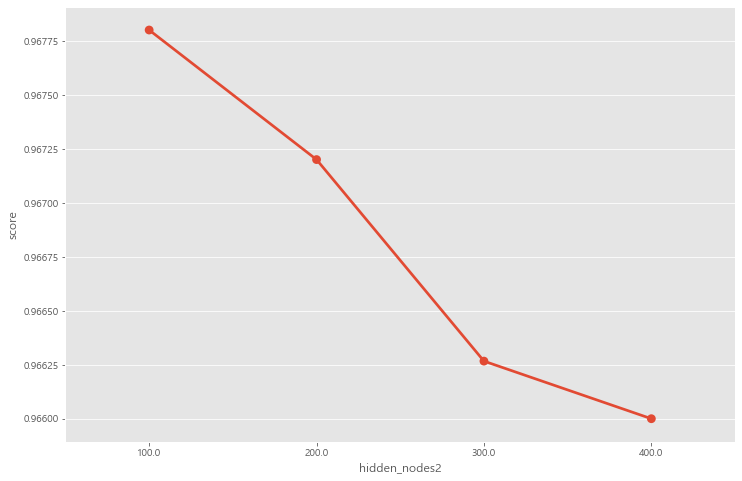

In [20]:
plt.figure(figsize=(12,8))
sns.pointplot(x=df2['hidden_nodes2'],y=df2['score'])

In [21]:
final_df = pd.concat([df,df2])
final_df['hidden_nodes'].fillna(100,inplace=True)
final_df['hidden_nodes2'].fillna(0,inplace=True)

In [23]:
final_df

,learning_rate,hidden_nodes,score,lr+hn,hidden_nodes2
0,0.01,100,0.9557,0.01-100,0.0
1,0.05,200,0.95775,0.05-200,0.0
2,0.1,300,0.959633,0.1-300,0.0
3,0.15,400,0.961225,0.15-400,0.0
4,0.2,500,0.96212,0.2-500,0.0
0,0.01,100,0.9678,0.01-100.0,100.0
1,0.01,100,0.9672,0.01-200.0,200.0
2,0.01,100,0.966267,0.01-300.0,300.0
3,0.01,100,0.966,0.01-400.0,400.0


Text(0.5, 1.0, 'learning_rate와 hidden_nodes의 개수에 따른 score 변화 추이(epochs=5 고정)')

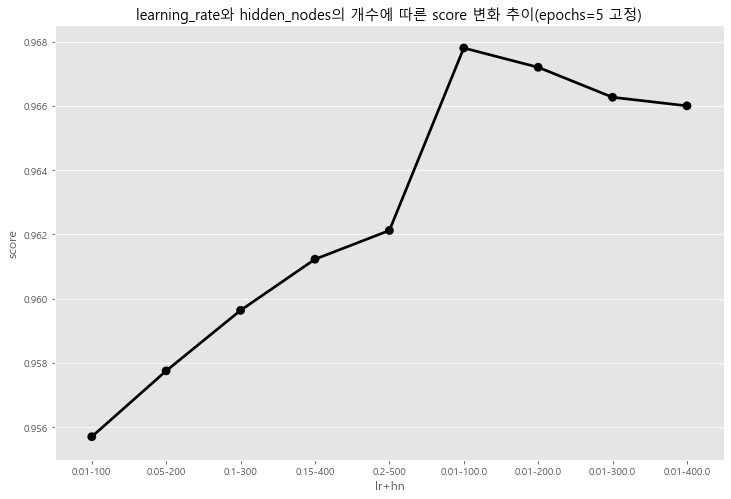

In [22]:
plt.figure(figsize=(12,8))
sns.pointplot(data=final_df,x='lr+hn',y='score',color='black')
plt.title("learning_rate와 hidden_nodes의 개수에 따른 score 변화 추이(epochs=5 고정)")

### hidden_layer 두개, learning_rate = 0.01, hidden_node 100, hidden_node2 100이 가장 score가 높았다

# 201600779 김영민